In [ ]:
arr = [1,-1] * 100
arr

In [ ]:
%%time

for i in range(1000000):
    pass

CPU times: user 56.8 ms, sys: 2.69 ms, total: 59.5 ms
Wall time: 61.7 ms


In [ ]:
!nvidia-smi

Thu Mar  2 11:31:52 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P0    29W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

konlpy 패키지 다운 및 데이터 불러오기

In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from konlpy.tag import *

hannanum = Hannanum()
kkma = Kkma()
komoran = Komoran()
okt = Okt()

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_excel('/content/02)웰니스_대화_스크립트_데이터셋.xlsx')
utter = data['utterance(2차) '].copy()
utter.dropna(inplace=True)
utter = pd.DataFrame(utter)
utter.reset_index(drop=True,inplace=True)

In [ ]:
data

,핵심증상,intent,keyword(임상키워드),특이사항,연관표현,utterance,utterance(2차),response(공감),임상질문그룹(연세의료원제공),utterance(긍정),utterance(부정),긍정에 대한 챗봇 답변,부정에 대한 챗봇 답변,추가발화(190917),추가발화 (191031)
0,지속되는우울한기분(우울감),정신증상/우울감,우울,NaN,머리가 짓눌러지는 느낌/머리가 맑지 않다/침울하면서 잠도 못 자다/후회가 많고 침울...,우울해,임신해서 우울해,기분이 우울하시군요. 00님에게 스트레스 받는 일이 있었던 건 아닌지 걱정스러워요.,"거의 매일, 하루 중 대부분 시간을 우울한 기분으로 있거나 가라앉았던 적이 있나요?",응,아니,저런… (우는 이모티콘) 기분이 나아지지 않는 상태군요.,그렇군요. 기분이 계속 처지신다면 편안한 음악을 한번 들어보는 것도 좋을 것 같아요.,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,너무 우울해,아이 가지고 나서 우울해,마음이 우울해서 힘드셨군요. 00님의 소식이 궁금했는데 마침 저를 잘 찾아주셨네요.,NaN,어,아닌데?,힘든 상황이시군요. 저랑 더 얘기를 나눠볼까요?,그랬군요. 또 기분이 안 좋아지면 언제든 저에게 이야기해주세요.,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,우울해죽겠어,아이 가졌는데 기분 하나도 안 좋고 울적해,00님이 울적하시다니 저도 마음이 안 좋아요.,NaN,엉,노,한번 가라앉은 기분을 다시 돌리기는 참 어려운 것 같아요. 저와 계속 얘기해봐요.,그런 증상은 없으셨군요. 00님의 머릿속에 낀 먹구름이 얼른 걷혔으면 좋겠어요.,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,기분이 우울해,임신했는데 남편이 하나도 안 챙겨줘서 우울하다,얼굴에서 00님의 기분이 가라앉은 것이 느껴져요. 큰일이 있으신 건 아니었으면 좋겠어요.,NaN,예스,아니거든,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,우울모드임,진단 결과 안 좋게 나올 것 같아서 우울해,NaN,NaN,네,아니야,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19764,NaN,NaN,NaN,NaN,NaN,NaN,그래도 잠못자고 불안한건 여전해요.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19765,NaN,NaN,NaN,NaN,NaN,NaN,불안함에 항상 시달리니까 잠도 못잤어요.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19766,NaN,NaN,NaN,NaN,NaN,NaN,불안하고 초조해서 잠이 안 와.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19767,NaN,NaN,NaN,NaN,NaN,NaN,너무 불안하니까 밤만 되면 잠이 안 오고 너무 초조해.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 4가지 형태소 분석기 비교 시험 --> 꼬꼬마 선택
for i in range(5):
  print(utter['utterance(2차) '][i])
  print('한나눔', hannanum.nouns(utter['utterance(2차) '][i]))
  print('꼬꼬마',kkma.nouns(utter['utterance(2차) '][i]))
  print('코모란',komoran.nouns(utter['utterance(2차) '][i]))
  print('트위터',okt.nouns(utter['utterance(2차) '][i]))

임신해서 우울해
한나눔 ['임신해서', '우울해']
꼬꼬마 ['임신']
코모란 ['임신', '우울']
트위터 ['임신']
아이 가지고 나서 우울해
한나눔 ['우울해']
꼬꼬마 ['아이', '나']
코모란 ['아이', '우울']
트위터 ['아이', '가지']
아이 가졌는데 기분 하나도 안 좋고 울적해
한나눔 ['기분', '하나', '울적해']
꼬꼬마 ['아이', '기분', '하나']
코모란 ['아이', '기분']
트위터 ['아이', '기분', '하나', '안']
임신했는데 남편이 하나도 안 챙겨줘서 우울하다
한나눔 ['임신', '남편', '우울']
꼬꼬마 ['임신', '남편', '하나', '우울', '우울하다', '하다']
코모란 ['임신', '남편', '우울']
트위터 ['임신', '남편', '하나', '안']
진단 결과 안 좋게 나올 것 같아서 우울해 
한나눔 ['결과', '것', '우울해']
꼬꼬마 ['진단', '결과']
코모란 ['진단', '결과', '것', '우울']
트위터 ['진단', '결과', '안', '것']


웰니스 데이터 형태소 분석

In [ ]:
utter_kkma = []
for i in range(len(utter)):
  utter_kkma.append(kkma.pos(utter['utterance(2차) '][i]))
  if i % 10 == 0:
    print(i)

19640
19650
19660
19670


In [ ]:
utter_kkma[1] #예시

[('아이', 'NNG'),
 ('가지', 'VV'),
 ('고', 'ECE'),
 ('나', 'NP'),
 ('서', 'JKM'),
 ('우울하', 'VV'),
 ('어', 'ECS')]

DSM-5 단어 데이터 전처리

(sheet 별로 나눠져 있으므로, 각 변수에 저장함.)

In [ ]:
#한셀로 저장한 엑셀은 오류뜸. 마이크로소프트 엑셀로 다시 저장해야함.

In [ ]:
#증강데이터를 우울장애 관련 표현_정리(1)로 이름을 바꾸고 다시 실행해봄.
data0 = pd.read_excel('/content/우울장애 관련 표현_정리 (1).xlsx',sheet_name=0)
words0 = data0.iloc[:,0]
data1 = pd.read_excel('/content/우울장애 관련 표현_정리 (1).xlsx',sheet_name=1)
words1 = data1.iloc[:,0]
data2 = pd.read_excel('/content/우울장애 관련 표현_정리 (1).xlsx',sheet_name=2)
words2 = data2.iloc[:,0]
data3 = pd.read_excel('/content/우울장애 관련 표현_정리 (1).xlsx',sheet_name=3)
words3 = data3.iloc[:,0]
data4 = pd.read_excel('/content/우울장애 관련 표현_정리 (1).xlsx',sheet_name=4)
words4 = data4.iloc[:,0]
words4.dropna(inplace=True)
words4 = (pd.DataFrame(words4).reset_index())['■지체(생각과 말이 느려짐, 집중력 저하, 운동 활성의 저하)']
data5 = pd.read_excel('/content/우울장애 관련 표현_정리 (1).xlsx',sheet_name=5)
words5 = data5.iloc[:,0]
data6 = pd.read_excel('/content/우울장애 관련 표현_정리 (1).xlsx',sheet_name=6)
words6 = data6.iloc[:,0]
data7 = pd.read_excel('/content/우울장애 관련 표현_정리 (1).xlsx',sheet_name=7)
words7 = data7.iloc[:,0]
data8 = pd.read_excel('/content/우울장애 관련 표현_정리 (1).xlsx',sheet_name=8)
words8 = data8.iloc[:,0]

In [ ]:
data0

,"1. 하루 중 대부분 그리고 거의 매일 지속되는 우울 기분에 대해 주관적으로 보고 (예, 슬픔, 공허하다 또는 절망감) 하거나 객관적으로 관찰됨(예, 눈물흘림)",Unnamed: 1
0,"우울한 기분 (슬픔, 절망감, 무력감, 무가치감)",빈도수 관련 단어 추가..?
1,가망이 없다,NaN
2,가슴 아프다,NaN
3,가치 없다,NaN
4,갇힌 것 같다,NaN
5,갑갑하다,NaN
6,고통스럽다,NaN
7,공허하다,NaN
8,괴롭다,NaN
9,기대할 것이 없다,NaN


In [ ]:
words4

0     다른 사람들이 눈치 챌 정도로 평소보다 말과 행동이 느려졌다
1                                   ■초조
2                              가만있지 못하다
3                                    걱정
4                                    공황
5                                    긴장
6                                꼼지락거린다
7                                  나무늘보
8                                  날카롭다
9                             눈을 못마주치겠다
10                                 느릿느릿
11                                두근거린다
12                                  두렵다
13                                   떨다
14                                 떨린다 
15                               말수가 줄다
16                              말이 느려지다
17                            말이 잘 안나오다
18                                  멍하다
19                               몸이 둔하다
20                               몸이 무겁다
21                                  무섭다
22                                   불길
23                                   불안
24                              소화가 안된다


DSM-5 단어 데이터 sheet 별로 형태소 분석

In [ ]:
lists0 = []
lists1 = []
lists2 = []
lists3 = []
lists4 = []
lists5 = []
lists6 = []
lists7 = []
lists8 = []

for i in range(len(words0)):
  lists0.append(kkma.pos(words0[i]))

for i in range(len(words1)):
  lists1.append(kkma.pos(words1[i]))

for i in range(len(words2)):
  lists2.append(kkma.pos(words2[i]))

for i in range(len(words3)):
  lists3.append(kkma.pos(words3[i]))

for i in range(len(words4)):
  lists4.append(kkma.pos(str(words4[i])))

for i in range(len(words5)):
  lists5.append(kkma.pos(words5[i]))

for i in range(len(words6)):
  lists6.append(kkma.pos(words6[i]))

for i in range(len(words7)):
  lists7.append(kkma.pos(words7[i]))

for i in range(len(words8)):
  lists8.append(kkma.pos(words8[i]))

In [ ]:
kkma.pos(words1[11])

[('덧', 'XPN'), ('없다', 'UN')]

In [ ]:
lists0 = []
lists0.append(kkma.pos('자살하면 편하겠지'))

In [ ]:
lists0

[[('자살', 'NNG'),
  ('하', 'XSV'),
  ('면', 'ECE'),
  ('편하', 'VA'),
  ('겠', 'EPT'),
  ('지', 'EFN')]]

In [ ]:
자살 편하

In [ ]:
rewords0 = []
rewords0.append([x for (x, y) in lists0[i] if any([y == 'XPN',y == 'NNG',y == 'NNP',y == 'NNB',y == 'NR',y == 'NP',y == 'VA',y == 'VV',y == 'VXA',y == 'VXV',y == 'VCP',y == 'VCN',y == 'MAG',y == 'XR'])])
print('1. :', rewords0)

IndexError: ignored

DSM-5 단어 형태소 분석한 것 중에, 의미를 포함한 품사만 빼오기

In [ ]:
rewords0 = []
for i in range(len(words0)):
  rewords0.append([x for (x, y) in lists0[i] if any([y == 'XPN',y == 'NNG',y == 'NNP',y == 'NNB',y == 'NR',y == 'NP',y == 'VA',y == 'VV',y == 'VXA',y == 'VXV',y == 'VCP',y == 'VCN',y == 'MAG',y == 'XR'])])
print('1. :', rewords0)

rewords1 = []
for i in range(len(words1)):
  rewords1.append([x for (x, y) in lists1[i] if any([y == 'XPN',y == 'NNG',y == 'NNP',y == 'NNB',y == 'NR',y == 'NP',y == 'VA',y == 'VV',y == 'VXA',y == 'VXV',y == 'VCP',y == 'VCN',y == 'MAG',y == 'XR'])])
print('2. :', rewords1)

rewords2 = []
for i in range(len(words2)):
  rewords2.append([x for (x, y) in lists2[i] if any([y == 'XPN',y == 'NNG',y == 'NNP',y == 'NNB',y == 'NR',y == 'NP',y == 'VA',y == 'VV',y == 'VXA',y == 'VXV',y == 'VCP',y == 'VCN',y == 'MAG',y == 'XR'])])
print('3. :', rewords2)

rewords3 = []
for i in range(len(words3)):
  rewords3.append([x for (x, y) in lists3[i] if any([y == 'XPN',y == 'NNG',y == 'NNP',y == 'NNB',y == 'NR',y == 'NP',y == 'VA',y == 'VV',y == 'VXA',y == 'VXV',y == 'VCP',y == 'VCN',y == 'MAG',y == 'XR'])])
print('4. :', rewords3)

rewords4 = []
for i in range(len(words4)):
  rewords4.append([x for (x, y) in lists4[i] if any([y == 'XPN',y == 'NNG',y == 'NNP',y == 'NNB',y == 'NR',y == 'NP',y == 'VA',y == 'VV',y == 'VXA',y == 'VXV',y == 'VCP',y == 'VCN',y == 'MAG',y == 'XR'])])
print('5. :', rewords4)

rewords5 = []
for i in range(len(words5)):
  rewords5.append([x for (x, y) in lists5[i] if any([y == 'XPN',y == 'NNG',y == 'NNP',y == 'NNB',y == 'NR',y == 'NP',y == 'VA',y == 'VV',y == 'VXA',y == 'VXV',y == 'VCP',y == 'VCN',y == 'MAG',y == 'XR'])])
print('6. :', rewords5)

rewords6 = []
for i in range(len(words6)):
  rewords6.append([x for (x, y) in lists6[i] if any([y == 'XPN',y == 'NNG',y == 'NNP',y == 'NNB',y == 'NR',y == 'NP',y == 'VA',y == 'VV',y == 'VXA',y == 'VXV',y == 'VCP',y == 'VCN',y == 'MAG',y == 'XR'])])
print('7. :', rewords6)

rewords7 = []
for i in range(len(words7)):
  rewords7.append([x for (x, y) in lists7[i] if any([y == 'XPN',y == 'NNG',y == 'NNP',y == 'NNB',y == 'NR',y == 'NP',y == 'VA',y == 'VV',y == 'VXA',y == 'VXV',y == 'VCP',y == 'VCN',y == 'MAG',y == 'XR'])])
print('8. :', rewords7)

rewords8 = []
for i in range(len(words8)):
  rewords8.append([x for (x, y) in lists8[i] if any([y == 'XPN',y == 'NNG',y == 'NNP',y == 'NNB',y == 'NR',y == 'NP',y == 'VA',y == 'VV',y == 'VXA',y == 'VXV',y == 'VCP',y == 'VCN',y == 'MAG',y == 'XR'])])
print('9. :', rewords8)

1. : [['우울', '기분', '슬프', '절망감', '무력감', '무가', '치감'], ['가망', '없'], ['가슴', '아프'], ['가치', '없'], ['갇히', '것', '같'], ['갑갑'], ['고통'], ['공허'], ['괴롭'], ['기대', '것', '없'], ['기분', '가라앉'], ['기분', '나쁘'], ['기분', '별', '닿'], ['기분', '안', '좋'], ['기분', '처지'], ['꿀꿀', '하다'], ['끔찍'], ['끝장'], ['나락'], ['눈물'], ['단념'], ['답답'], ['더', '내려가', '데', '없'], ['마음', '아프'], ['막다르', '느낌'], ['막막'], ['망하'], ['무의미', '하다'], ['바닥', '내려가'], ['방법', '없'], ['방향', '잃'], ['부질없'], ['불편'], ['불행'], ['비참'], ['살', '싫'], ['생각', '싫'], ['센치', '하다'], ['속상하'], ['슬프'], ['실패'], ['앞', '캄캄하'], ['외롭'], ['우울', '하다'], ['울', '싶'], ['울적'], ['이생', '망'], ['저주', '받'], ['절망'], ['좌절'], ['죽', '싶'], ['죽', '맛', '이'], ['지옥', '같'], ['체념'], ['침울'], ['포기'], ['하', '수', '없'], ['행복', '않'], ['희망', '없'], ['힘들']]
2. : [['가라앉'], ['감정', '안', '느껴지'], ['감흥', '없'], ['관심', '없'], ['관심', '줄달'], ['귀찮'], ['그만두'], ['나가', '싫'], ['노', '관심'], ['노', '잼'], ['눕', '있'], ['덧'], ['되', '대로', '되'], ['때려치'], ['만나', '귀찮'], ['무관심'], ['무기력'], ['무의미'], ['부', '없'], ['생각', '없'], ['소용', '없'], ['시무룩']

웰니스 데이터에, 위 필요한 DSM-5 데이터의 각각 '리스트'가 한 문장에 모두 포함되면 True.

In [ ]:
words8

0         자살(또는 자해)
1      고통에서 벗어나고 싶다
2        고통을 멈추고 싶다
3           그만하고 싶다
4                 끈
5               끝내다
6            나만 없으면
7     내일 눈을 뜨지 않았으면
8       내일이 오지 않았으면
9       높은 곳에서 떨어지다
10              담배빵
11          도망가고 싶다
12              마지막
13           목숨을 끊다
14           목을 매달다
15            못 버티다
16              번개탄
17          벗어나고 싶다
18          사는게 지친다
19          사라지고 싶다
20         살 가치가 없다
21         살 이유가 없다
22            살기 싫다
23           살기 힘들다
24          살아서 뭐하나
25     세상에서 없어지고 싶다
26       세상을 떠나고 싶다
27           손목 긋는다
28       안 아프게 죽는 법
29       약을 한꺼번에 먹다
30               유서
31       이제 편해지고 싶다
32        이제 희망이 없다
33               자살
34           자살 마렵다
35             자살방법
36             자살충동
37               자해
38      잠에서 깨지 않았으면
39             죽고싶다
40            죽는 방법
41           죽는게 낫다
42          죽어도 괜찮다
43           죽어야 한다
44               죽음
45               칼빵
46         한강에 뛰어들다
47             현실도피
Name: 9. 반복적인 죽음에 대한 생각(단지 죽움에 대한 두려움이 아

reddit data 추가적으로 사용

In [ ]:
rdata1 = pd.read_csv('/content/ko_data[0_15861].csv')
rdata2 = pd.read_csv('/content/ko_data[15861_21019].csv')
rdata3 = pd.read_csv('/content/ko_data[21019_22153].csv')
rdata4 = pd.read_csv('/content/ko_data[22153_28407].csv')
rdata5 = pd.concat([rdata1,rdata2])
rdata6 = pd.concat([rdata5,rdata3])
rdata7 = pd.concat([rdata6,rdata4])
rdata7.reset_index(inplace=True)
rdata7.drop(columns = 'index',inplace=True)
rdata7

,text
0,나는 중독성 성격이 없어서 지난 2년 동안 항우울제에 트라마돌을 보충하고 있습니다.
1,나는 가끔 술에 취해 보인다
2,하지만 지난 28개월 동안 나는 높은 스트레스를 유지했고 일을 빠르게 진행했으며 그...
3,나는 운전에 문제가 있었습니다. 그것은 아마도 내 모든 에너지를 소모하는 일과 더 ...
4,그것은 삶을 변화시켰습니다.
...,...
28402,그래서 반복합니다. 요점이 무엇입니까?
28403,지금 너무 많은 걸 놓친 것 같아 절대 행복할 수 없어
28404,나는 너무 많은 것을 잃었고 그것을 되찾을 방법이 없다.
28405,매일 밤 잠자리에 들 때마다 깨지 않았으면 좋겠어


In [ ]:
#reddit data만 하고 싶을 때
utter_kkma = []
for i in range(len(rdata7)):
  utter_kkma.append(kkma.pos(rdata7['text'][i]))
  if i % 10 == 0:
    print(i)

28400


In [ ]:
#reddit data 만 하고싶을 때 2
utter = rdata7.copy()

In [ ]:
#웰니스랑 reddit data 둘다 하고 싶을때
for i in range(len(utter)):
  utter_kkma.append(kkma.pos(utter['utterance(2차) '][i]))
  if i % 10 == 0:
    print(i)

In [ ]:
len(utter_kkma)

28407

In [ ]:
file0 = pd.DataFrame(columns=['행','상담 데이터','포함된 DSM-5 형태소'])
file1 = pd.DataFrame(columns=['행','상담 데이터','포함된 DSM-5 형태소'])
file2 = pd.DataFrame(columns=['행','상담 데이터','포함된 DSM-5 형태소'])
file3 = pd.DataFrame(columns=['행','상담 데이터','포함된 DSM-5 형태소'])
file4 = pd.DataFrame(columns=['행','상담 데이터','포함된 DSM-5 형태소'])
file5 = pd.DataFrame(columns=['행','상담 데이터','포함된 DSM-5 형태소'])
file6 = pd.DataFrame(columns=['행','상담 데이터','포함된 DSM-5 형태소'])
file7 = pd.DataFrame(columns=['행','상담 데이터','포함된 DSM-5 형태소'])
file8 = pd.DataFrame(columns=['행','상담 데이터','포함된 DSM-5 형태소'])

In [ ]:
#레딧일 때는 'text' 웰니스일때는 'utterance(2차) '. 웰니스의 경우 띄어쓰기 주의.

num0 = []
for i in range(len(utter_kkma)):
  for j in range(len(rewords0)):
    if all(keyword in [x for (x, y) in utter_kkma[i]] for keyword in rewords0[j]) is True:
      num0.append(i)
      file0=file0.append({'행' : i, '상담 데이터' : utter['text'][i], '포함된 DSM-5 형태소' : rewords0[j]}, ignore_index=True)
      #print(i, '행:', utter['text'][i], rewords0[j])

num1 = []
for i in range(len(utter_kkma)):
  for j in range(len(rewords1)):
    if all(keyword in [x for (x, y) in utter_kkma[i]] for keyword in rewords1[j]) is True:
      num1.append(i)
      file1=file1.append({'행' : i, '상담 데이터' : utter['text'][i], '포함된 DSM-5 형태소' : rewords1[j]}, ignore_index=True)
      #print(i, '행:', utter['text'][i], rewords1[j])

num2 = []
for i in range(len(utter_kkma)):
  for j in range(len(rewords2)):
    if all(keyword in [x for (x, y) in utter_kkma[i]] for keyword in rewords2[j]) is True:
      num2.append(i)
      file2=file2.append({'행' : i, '상담 데이터' : utter['text'][i], '포함된 DSM-5 형태소' : rewords2[j]}, ignore_index=True)
      #print(i, '행:', utter['text'][i], rewords2[j])


num3 = []
for i in range(len(utter_kkma)):
  for j in range(len(rewords3)):
    if all(keyword in [x for (x, y) in utter_kkma[i]] for keyword in rewords3[j]) is True:
      num3.append(i)
      file3=file3.append({'행' : i, '상담 데이터' : utter['text'][i], '포함된 DSM-5 형태소' : rewords3[j]}, ignore_index=True)
      #print(i, '행:', utter['text'][i], rewords3[j])

num4 = []
for i in range(len(utter_kkma)):
  for j in range(len(rewords4)):
    if all(keyword in [x for (x, y) in utter_kkma[i]] for keyword in rewords4[j]) is True:
      num4.append(i)
      file4=file4.append({'행' : i, '상담 데이터' : utter['text'][i], '포함된 DSM-5 형태소' : rewords4[j]}, ignore_index=True)
      #print(i, '행:', utter['text'][i], rewords4[j])

num5 = []
for i in range(len(utter_kkma)):
  for j in range(len(rewords5)):
    if all(keyword in [x for (x, y) in utter_kkma[i]] for keyword in rewords5[j]) is True:
      num5.append(i)
      file5=file5.append({'행' : i, '상담 데이터' : utter['text'][i], '포함된 DSM-5 형태소' : rewords5[j]}, ignore_index=True)
      #print(i, '행:', utter['text'][i], rewords5[j])

num6 = []
for i in range(len(utter_kkma)):
  for j in range(len(rewords6)):
    if all(keyword in [x for (x, y) in utter_kkma[i]] for keyword in rewords6[j]) is True:
      num6.append(i)
      file6=file6.append({'행' : i, '상담 데이터' : utter['text'][i], '포함된 DSM-5 형태소' : rewords6[j]}, ignore_index=True)
      #print(i, '행:', utter['text'][i], rewords6[j])

num7 = []
for i in range(len(utter_kkma)):
  for j in range(len(rewords7)):
    if all(keyword in [x for (x, y) in utter_kkma[i]] for keyword in rewords7[j]) is True:
      num7.append(i)
      file7=file7.append({'행' : i, '상담 데이터' : utter['text'][i], '포함된 DSM-5 형태소' : rewords7[j]}, ignore_index=True)
      #print(i, '행:', utter['text'][i], rewords7[j])

num8 = []
for i in range(len(utter_kkma)):
  for j in range(len(rewords8)):
    if all(keyword in [x for (x, y) in utter_kkma[i]] for keyword in rewords8[j]) is True:
      num8.append(i)
      file8=file8.append({'행' : i, '상담 데이터' : utter['text'][i], '포함된 DSM-5 형태소' : rewords8[j]}, ignore_index=True)
      #print(i, '행:', utter['text'][i], rewords8[j])                              


print('1: ',len(set(num0)),'2: ',len(set(num1)),'3: ',len(set(num2)),'4: ',len(set(num3)),'5: ',len(set(num4)),'6: ',len(set(num5)),'7: ',len(set(num6)),'8: ',len(set(num7)),'9: ',len(set(num8)))

1:  3226 2:  2665 3:  102 4:  102 5:  1209 6:  142 7:  1215 8:  268 9:  3048


결과 파일 엑셀 시트별로 저장하기

In [ ]:
with pd.ExcelWriter('/content/'+'웰니스 DSM-5 분류.xlsx') as writer:
    file0.to_excel(writer, sheet_name='Sheet1',index=None)
    file1.to_excel(writer, sheet_name='Sheet2',index=None)
    file2.to_excel(writer, sheet_name='Sheet3',index=None)
    file3.to_excel(writer, sheet_name='Sheet4',index=None)
    file4.to_excel(writer, sheet_name='Sheet5',index=None)
    file5.to_excel(writer, sheet_name='Sheet6',index=None)
    file6.to_excel(writer, sheet_name='Sheet7',index=None)
    file7.to_excel(writer, sheet_name='Sheet8',index=None)
    file8.to_excel(writer, sheet_name='Sheet9',index=None)

In [ ]:
with pd.ExcelWriter('/content/'+'레딧 구글번역 DSM-5 분류.xlsx') as writer:
    file0.to_excel(writer, sheet_name='Sheet1',index=None)
    file1.to_excel(writer, sheet_name='Sheet2',index=None)
    file2.to_excel(writer, sheet_name='Sheet3',index=None)
    file3.to_excel(writer, sheet_name='Sheet4',index=None)
    file4.to_excel(writer, sheet_name='Sheet5',index=None)
    file5.to_excel(writer, sheet_name='Sheet6',index=None)
    file6.to_excel(writer, sheet_name='Sheet7',index=None)
    file7.to_excel(writer, sheet_name='Sheet8',index=None)
    file8.to_excel(writer, sheet_name='Sheet9',index=None)

In [ ]:
file5

,행,상담 데이터,포함된 DSM-5 형태소
0,143,"그러나 내 몸에는 좋지 않습니다. 증상으로는 가려운 피부, 약한 뼈, 낮은 에너지,...",[늘어지]
1,193,이 피로가 오늘 벽돌 벽처럼 나를 때릴 때까지 모든 것이 잘 진행되고 있었습니다.,[피로]
2,198,"그것에 대해 생각하면 할수록 내가 왜 그렇게 피곤한지 이해가 되지만, 정말 스멀스멀...",[피곤]
3,403,내 글이 나를 구원하지 못할 것이 분명하다,"[나르, 하다]"
4,541,나도 소진의 한가운데 있다고 확신하지만 내 상사는 엉덩이이고 헤어날 수 없다.,[소진]
...,...,...,...
138,26755,"모든 일에 피로가 닥치면, 나는 살아남기 위해 내가 가진 작은 것을 망가뜨릴 것입니다.",[피로]
139,27150,"요즘 상황이 더 심해졌어, 항상 피곤하고 항상 너무 지루하고 부끄러워",[피곤]
140,27189,"나는 여전히 스트레스를 받고, 불안하고, 피곤하고, 약간 아프다",[피곤]
141,27304,내가 얼마나 한심한가? 밖에 나가서 친구들이 춤추고 노는 걸 보는 것도 존나 지겨워...,[피곤]


In [ ]:
utter_kkma[1]

[('나', 'NP'),
 ('는', 'JX'),
 ('가끔', 'MAG'),
 ('술', 'NNG'),
 ('에', 'JKM'),
 ('취하', 'VV'),
 ('어', 'ECS'),
 ('보이', 'VV'),
 ('ㄴ다', 'EFN')]

빈도수 시각화

In [ ]:
import matplotlib.pyplot as plt

x = ['1', '2', '3', '4', '5', '6', '7', '8', '9']
y = [ len(set(num0)), len(set(num1)),len(set(num2)),len(set(num3)),len(set(num4)),len(set(num5)),len(set(num6)),len(set(num7)),len(set(num8))]

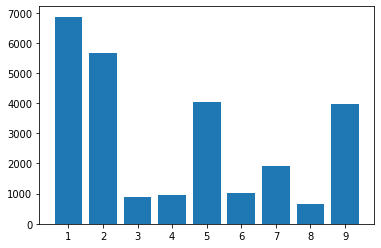

In [ ]:
import seaborn as sns

# 차트 세로로 그리기
plt.bar(x,y)
plt.show()

# 웰니스 상담 데이터만 더 전처리 해보기

In [ ]:
now = pd.read_excel('웰니스 DSM-5 분류.xlsx', sheet_name =0)

In [ ]:
import pandas as pd 
data1 = pd.read_excel('웰니스 DSM-5 분류.xlsx', sheet_name =0)
data2 = pd.read_excel('웰니스 DSM-5 분류.xlsx', sheet_name =1)
data3 = pd.read_excel('웰니스 DSM-5 분류.xlsx', sheet_name =2)
data4 = pd.read_excel('웰니스 DSM-5 분류.xlsx', sheet_name =3)
data5 = pd.read_excel('웰니스 DSM-5 분류.xlsx', sheet_name =4)
data6 = pd.read_excel('웰니스 DSM-5 분류.xlsx', sheet_name =5)
data7 = pd.read_excel('웰니스 DSM-5 분류.xlsx', sheet_name =6)
data8 = pd.read_excel('웰니스 DSM-5 분류.xlsx', sheet_name =7)
data9 = pd.read_excel('웰니스 DSM-5 분류.xlsx', sheet_name =8)
data1

,행,상담 데이터,포함된 DSM-5 형태소
0,2,아이 가졌는데 기분 하나도 안 좋고 울적해,"['기분', '안', '좋']"
1,2,아이 가졌는데 기분 하나도 안 좋고 울적해,['울적']
2,3,임신했는데 남편이 하나도 안 챙겨줘서 우울하다,"['우울', '하다']"
3,6,하고 싶은 거 못 해서 이렇게 우울할 수가 없어,"['하', '수', '없']"
4,8,술 못 마시니까 진짜 우울하다,"['우울', '하다']"
...,...,...,...
3892,19660,불안할 때면 눈물이 나지만 요샌 불안한지도 몰라.,['눈물']
3893,19665,온몸이 막 떨리고 눈물 날 것 같고… 진짜 너무 무서웠어.,['눈물']
3894,19666,그거 때문에 요즘 힘들고 불안하지.,['힘들']
3895,19667,하루하루가 힘들고 불안해.,['힘들']


In [ ]:
#반복문을 통해 9개의 데이터 간단 전처리
for i in range(1,10):

  # 상담 데이터 제외한 열 삭제 (axis=1 : 열 단위, inplace=True : 저장 개념)
  globals()["data{}".format(i)].drop('행',axis=1,inplace=True)
  globals()["data{}".format(i)].drop('포함된 DSM-5 형태소',axis=1,inplace=True)

  # 중복 데이터 삭제 
  globals()["data{}".format(i)].drop_duplicates(inplace=True)

  # 순서 초기화 (drop=True : 열을 새로 만들지 않음.)
  globals()["data{}".format(i)].reset_index(drop=True, inplace=True)

  # sheet 번호를 label 열의 값으로 변경함.
  globals()["data{}".format(i)]['label']= i
data7

,상담 데이터,label
0,입덧 때문에 힘이 안 나,7
1,남편이 날 신경 써주지 않으니까 울적하고 아무것도 하기 싫어,7
2,불면이랑 우울이 해결이 안 되는데 나 어떻게 해야 할까,7
3,능력 있는 남자와 결혼한 친구들보면 열등감인지 패배감인지 자격지심이 생겨요,7
4,자존심이 너무 상해서 위안이 필요한 것 같아,7
...,...,...
711,부모님에게도 정말 죄송해서 죽고 싶었어요.,7
712,내 탓인것 같아서 죽고 싶어.,7
713,"걔가 미안하다고 했는데도, 기분이 더러워서 홧김에 감기약을 80개 정도 한꺼번에 먹었어.",7
714,"학교는 가기 싫은데, 또 안 나가도 불안했어요.",7


In [ ]:
data2

,상담 데이터,label
0,하고 싶은 거 못 해서 이렇게 우울할 수가 없어,2
1,기분이 계속 가라앉아서 땅 속에 꺼진 느낌이야,2
2,우울해서 힘드네,2
3,꿀꿀하니까 세상이 싫어져,2
4,우울한 건 어쩔 수가 없어,2
...,...,...
2999,치료받으려고 누워있는데 엄청 불안하고 초조한거에요.,2
3000,이런 제가 너무 피곤한데 이렇게 안 하면 계속 불안해요.,2
3001,그거 때문에 요즘 힘들고 불안하지.,2
3002,하루하루가 힘들고 불안해.,2


In [ ]:
#레이블 별로 개수 세어보기
for i in range(1,10):
  print('data',i,': ', globals()['data{}'.format(i)]['label'].count())

data 1 :  3636
data 2 :  3004
data 3 :  580
data 4 :  825
data 5 :  2835
data 6 :  836
data 7 :  716
data 8 :  394
data 9 :  926


In [ ]:
data_all = pd.concat([data1,data2,data3,data4,data5,data6,data7,data8,data9])
data_all.reset_index(drop=True, inplace=True)
data_all

,상담 데이터,label
0,아이 가졌는데 기분 하나도 안 좋고 울적해,1
1,임신했는데 남편이 하나도 안 챙겨줘서 우울하다,1
2,하고 싶은 거 못 해서 이렇게 우울할 수가 없어,1
3,술 못 마시니까 진짜 우울하다,1
4,유도 실패해서 개 우울해,1
...,...,...
13747,불안해서 죽고 싶어,9
13748,불안해서 죽을 것 같아,9
13749,불안해서 죽고 싶어요,9
13750,애 낳은 후에도 이럴까봐 불안해 죽겠어,9


In [ ]:
pd.DataFrame(data_all['상담 데이터'].value_counts())

,상담 데이터
계속 못 자니까 졸리고 피곤하고 힘들어 죽겠어.,6
피곤하고 멍해서 죽겠어,5
운전만 하려면 피곤하고 멍해지네,4
월요일에 특히 피곤하고 멍해,4
짜증 낼 때마다 가족들한테 미안한데 이게 어쩔 수 없어서 나도 답답하고 우울해.,4
...,...
식욕이 없으면 어디 안 좋다는 거야?,1
식욕이 없는 것도 문제가 있는 거야?,1
요새 왜 이렇게 식욕이 없을까?,1
식욕이 없어졌어.,1


# 다른 전처리(발표자료참고) *********중복을 삭제한 경우라 미팅 때 좋은 방법이 아니라고 하셨음!!!!!!!!!!!!!! 시도 XXXXXX

In [ ]:
import pandas as pd 
data1 = pd.read_excel('웰니스 DSM-5 분류.xlsx', sheet_name =0)
data2 = pd.read_excel('웰니스 DSM-5 분류.xlsx', sheet_name =1)
data3 = pd.read_excel('웰니스 DSM-5 분류.xlsx', sheet_name =2)
data4 = pd.read_excel('웰니스 DSM-5 분류.xlsx', sheet_name =3)
data5 = pd.read_excel('웰니스 DSM-5 분류.xlsx', sheet_name =4)
data6 = pd.read_excel('웰니스 DSM-5 분류.xlsx', sheet_name =5)
data7 = pd.read_excel('웰니스 DSM-5 분류.xlsx', sheet_name =6)
data8 = pd.read_excel('웰니스 DSM-5 분류.xlsx', sheet_name =7)
data9 = pd.read_excel('웰니스 DSM-5 분류.xlsx', sheet_name =8)

#반복문을 통해 9개의 데이터 간단 전처리
for i in range(1,10):

  # sheet 번호를 label 열의 값으로 변경함.
  globals()["data{}".format(i)]['label']= i


data_all = pd.concat([data1,data2,data3,data4,data5,data6,data7,data8,data9])
data_all.reset_index(drop=True, inplace=True)
data_all

,행,상담 데이터,포함된 DSM-5 형태소,label
0,2,아이 가졌는데 기분 하나도 안 좋고 울적해,"['기분', '안', '좋']",1
1,2,아이 가졌는데 기분 하나도 안 좋고 울적해,['울적'],1
2,3,임신했는데 남편이 하나도 안 챙겨줘서 우울하다,"['우울', '하다']",1
3,6,하고 싶은 거 못 해서 이렇게 우울할 수가 없어,"['하', '수', '없']",1
4,8,술 못 마시니까 진짜 우울하다,"['우울', '하다']",1
...,...,...,...,...
15064,19312,불안해서 죽고 싶어요,"['죽', '싶']",9
15065,19312,불안해서 죽고 싶어요,"['죽', '하']",9
15066,19342,애 낳은 후에도 이럴까봐 불안해 죽겠어,"['죽', '하']",9
15067,19616,친구가 그렇게 죽고 나서 괜찮을 줄 알았는데 너무 불안해.,"['죽', '괜찮']",9


In [ ]:
data_all[data_all['포함된 DSM-5 형태소'] == "['하', '수', '없']"]

,행,상담 데이터,포함된 DSM-5 형태소,label
3,6,하고 싶은 거 못 해서 이렇게 우울할 수가 없어,"['하', '수', '없']",1
13,65,우울한 건 어쩔 수가 없어,"['하', '수', '없']",1
14,68,우울한 건 어쩔 수 없어,"['하', '수', '없']",1
136,683,의욕이 없는 건 어쩔 수 없지만 우울한 건 진짜 힘든 것 같아,"['하', '수', '없']",1
189,875,이거 먹으면 몽롱해서 일을 제대로 할 수가 없거든.,"['하', '수', '없']",1
...,...,...,...,...
7114,19381,너무 불안해서 일을 할 수가 없어.,"['하', '수', '없']",2
7115,19384,너무 불안해서 견딜 수가 없거든.,"['하', '수', '없']",2
7118,19406,어쩔 수 없다고 생각은 하면서도 그래도 불안한 건 어쩔 수가 없더라.,"['하', '수', '없']",2
7119,19434,근데 또 안 하면 제가 불안해서 견딜 수가 없어요.,"['하', '수', '없']",2


In [ ]:
data_all.drop(data_all[data_all['포함된 DSM-5 형태소'] == "['하', '수', '없']"].index, inplace=True)

In [ ]:
data_all[data_all['포함된 DSM-5 형태소'] == "['나', '없']"]

,행,상담 데이터,포함된 DSM-5 형태소,label
13978,40,우울해서 이대로 내가 없어질 것 같아,"['나', '없']",9
13984,252,티브이도 재미없고 뭐하나 하고 싶은 게 없어,"['나', '없']",9
13985,274,나도 좋은 생각하고 싶고 무기력한 게 없어졌으면 좋겠어,"['나', '없']",9
13990,644,임신하고 나서 우울하고 의욕이 없어,"['나', '없']",9
13997,954,나는 더 이상 인간으로 살 수가 없는 건가?,"['나', '없']",9
...,...,...,...,...
14531,17943,이제 돈도 다 써가고…아이는 아직 한참 엄마 손이 필요한 나인데…도와줄 사람도 없어...,"['나', '없']",9
14537,18067,제 인생은 이대로 끝나버린 것 같고 삶의 낙이 없어요.,"['나', '없']",9
14653,18314,그냥 내가 없어졌으면 좋겠다는 생각...,"['나', '없']",9
14698,18370,살아갈 이유가 없어. 누가 나를 죽여주면 좋겠어.,"['나', '없']",9


In [ ]:
data_all.drop(data_all[data_all['포함된 DSM-5 형태소'] == "['나', '없']"].index,inplace=True)

In [ ]:
data_all[data_all['포함된 DSM-5 형태소'] == "['하', '싫']"]

,행,상담 데이터,포함된 DSM-5 형태소,label
3900,54,꿀꿀하니까 세상이 싫어져,"['하', '싫']",2
3904,142,다 싫은데 뭘 어떻게 해야 할지 모르겠어,"['하', '싫']",2
3905,145,애기가 꿈틀거리는 게 싫을 정도로 암울해,"['하', '싫']",2
3917,238,남편이 날 신경 써주지 않으니까 울적하고 아무것도 하기 싫어,"['하', '싫']",2
3918,239,몸이 무거워지니까 우울하고 아무것도 하기 싫고 그래,"['하', '싫']",2
...,...,...,...,...
7058,18637,하기 싫은 건 계속 하기 싫고… 그냥 죽고 싶어요.,"['하', '싫']",2
7125,19503,"학교는 가기 싫은데, 또 안 나가도 불안했어요.","['하', '싫']",2
7128,19537,마음은 항상 불안하고…사람이 싫어요.,"['하', '싫']",2
7129,19566,저녁만 되면 불안해. 어두운 게 싫어. 조명이 환하게 켜진 곳만 찾아 다녀.,"['하', '싫']",2


In [ ]:
data_all.drop(data_all[data_all['포함된 DSM-5 형태소'] == "['하', '싫']"].index,inplace=True)

In [ ]:
data_all[data_all['포함된 DSM-5 형태소'] == "['나', '때문', '이']"]

,행,상담 데이터,포함된 DSM-5 형태소,label
12828,221,입덧 때문에 힘이 안 나,"['나', '때문', '이']",7
12837,951,나 때문인가..,"['나', '때문', '이']",7
12843,1347,왜냐하면 내가 이렇게 우울한 이유가 엄마 때문이거든.,"['나', '때문', '이']",7
12866,1922,나 때문에 아기가 안 자라고 있는 것 같아서 자꾸 죄책감이 들어,"['나', '때문', '이']",7
12889,1959,나 때문에 아이가 고생하는구나 싶어서 너무 슬프고 죄책감이 심해져,"['나', '때문', '이']",7
...,...,...,...,...
13317,15291,나 때문에 모든 가족이 피해를 본다고 생각했어.,"['나', '때문', '이']",7
13366,15453,마누라가 암 걸린 게 나 때문은 아닐까 싶어서 죄책감이 들어.,"['나', '때문', '이']",7
13402,16378,나를 무시하는 사람들 때문에 하루하루 사는 게 힘들어요,"['나', '때문', '이']",7
13537,17322,나 안 그래도 자존감 낮은데 이 일 때문에 더 낮아진 것 같아.,"['나', '때문', '이']",7


In [ ]:
data_all.drop(data_all[data_all['포함된 DSM-5 형태소'] == "['나', '때문', '이']"].index,inplace=True)

In [ ]:
data_all[data_all['포함된 DSM-5 형태소'] == "['나', '싫']"]

,행,상담 데이터,포함된 DSM-5 형태소,label
12829,238,남편이 날 신경 써주지 않으니까 울적하고 아무것도 하기 싫어,"['나', '싫']",7
12834,699,아무것도 하기 싫고 눈물만 나고 계속 우울해진다,"['나', '싫']",7
12840,1272,우울해서 뭘 할 힘도 안 나고 아무 것도 하기 싫어요.,"['나', '싫']",7
12903,3059,이런 제가 너무 싫어서 막 어쩔 때는 그냥 눈물이 나요.,"['나', '싫']",7
12905,3127,내가 너무 싫데.,"['나', '싫']",7
12908,3173,나는 왜 이거밖에 안 될까… 내가 너무 싫고… 그냥 다 너무 속상해.,"['나', '싫']",7
12915,4403,나도 한번쯤은 투정부리고 싫은 소리해도 괜찮은 거 아닌가 분해,"['나', '싫']",7
12919,4468,그런 인간들 상종하기 싫은데 매일 보니까 자꾸 짜증나고 화가 나,"['나', '싫']",7
12937,4782,내가 너무 밉고 싫어요.,"['나', '싫']",7
12938,4791,나는 엄마가 너무 싫어.,"['나', '싫']",7


In [ ]:
data_all.drop(data_all[data_all['포함된 DSM-5 형태소'] == "['나', '싫']"].index,inplace=True)

In [ ]:
data_all[data_all['포함된 DSM-5 형태소'] == "['나', '안', '되']"]

,행,상담 데이터,포함된 DSM-5 형태소,label
12830,399,불면이랑 우울이 해결이 안 되는데 나 어떻게 해야 할까,"['나', '안', '되']",7
12835,703,비관적으로 생각하게 돼서 의욕이 안 나,"['나', '안', '되']",7
12836,799,집중도 안 되고 우울증 도지고 나서부터 일하는 게 너무 오래 걸려,"['나', '안', '되']",7
12839,1150,나는 정말 이거밖에 안 되는구나 싶어서 우울하고…,"['나', '안', '되']",7
12846,1623,그 꿈을 꾸고 나면 항상 기분이 다운되고 너무 안 좋아.,"['나', '안', '되']",7
...,...,...,...,...
13541,17347,나는 이 정도밖에 안 되는 사람인 것 같은데.,"['나', '안', '되']",7
13550,17411,나만 아기가 안 생기니까 너무 걱정되고 좌절감이 들었어,"['나', '안', '되']",7
13564,18052,내가 최선을 다 해도 안 되는 일이 있는 거 같아…,"['나', '안', '되']",7
13566,18081,왜 나만 안 되나 좌절감도 들고.,"['나', '안', '되']",7


In [ ]:
data_all.drop(data_all[data_all['포함된 DSM-5 형태소'] == "['나', '안', '되']"].index,inplace=True)

In [ ]:
data_all

,행,상담 데이터,포함된 DSM-5 형태소,label
0,2,아이 가졌는데 기분 하나도 안 좋고 울적해,"['기분', '안', '좋']",1
1,2,아이 가졌는데 기분 하나도 안 좋고 울적해,['울적'],1
2,3,임신했는데 남편이 하나도 안 챙겨줘서 우울하다,"['우울', '하다']",1
4,8,술 못 마시니까 진짜 우울하다,"['우울', '하다']",1
5,17,유도 실패해서 개 우울해,['실패'],1
...,...,...,...,...
15064,19312,불안해서 죽고 싶어요,"['죽', '싶']",9
15065,19312,불안해서 죽고 싶어요,"['죽', '하']",9
15066,19342,애 낳은 후에도 이럴까봐 불안해 죽겠어,"['죽', '하']",9
15067,19616,친구가 그렇게 죽고 나서 괜찮을 줄 알았는데 너무 불안해.,"['죽', '괜찮']",9


In [ ]:
# 행(상담 데이터)를 기준으로 중복 삭제
data_all.drop_duplicates('행', inplace=True)

In [ ]:
# 인덱스 초기화
data_all.reset_index(drop=True, inplace=True)

In [ ]:
data_all

,행,상담 데이터,포함된 DSM-5 형태소,label
0,2,아이 가졌는데 기분 하나도 안 좋고 울적해,"['기분', '안', '좋']",1
1,3,임신했는데 남편이 하나도 안 챙겨줘서 우울하다,"['우울', '하다']",1
2,8,술 못 마시니까 진짜 우울하다,"['우울', '하다']",1
3,17,유도 실패해서 개 우울해,['실패'],1
4,20,기분이 계속 가라앉아서 땅 속에 꺼진 느낌이야,"['기분', '가라앉']",1
...,...,...,...,...
9330,18735,현실인지 알고 싶어서 눈뜨자마자 손목을 그어버렸어.,"['손목', '긋']",9
9331,18743,술을 잔뜩 마시고 정신이 없는 상태에서 손목을 그었어요.,"['손목', '긋']",9
9332,18746,자살충동이 드는 이유가 뭘까,['자살'],9
9333,18747,자살충동을 느껴,['자살'],9


In [ ]:
data_all.to_csv('웰니스 DSM-5 레이블 데이터.csv', index=None)

In [ ]:
for i in range(1,10):
  print(data_all['label'][data_all['label']==i].count())

3449
1228
509
680
2435
190
441
180
223


In [ ]:
import matplotlib.pyplot as plt

x = ['1', '2', '3', '4', '5', '6', '7', '8', '9']
y = [ 3449, 1228,509,680,2435,190,441,180,223]

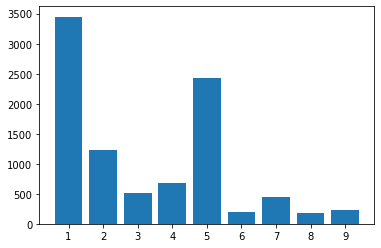

In [ ]:
import seaborn as sns

# 차트 세로로 그리기
plt.bar(x,y)
plt.show()